In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path='50kV-32kV.xlsx'
data=pd.read_excel(path)

In [3]:
df=data[data.columns[::2]]
df1=data.iloc[:,1::2]

In [4]:
x=df.iloc[:,1]

In [5]:
import math

c1=(80-10)/(16*50)
x=x.multiply(other = c1*100)

In [6]:
x=x.iloc[60:]
x

60     -57.57500
61     -57.51375
62     -57.45250
63     -57.39125
64     -57.33000
          ...   
1996    61.00500
1997    61.06625
1998    61.12750
1999     0.00000
2000    61.18875
Name: 1.04, Length: 1941, dtype: float64

In [7]:
y=list(df.columns)
df2=df1.iloc[60:,:]
df2.shape


(1941, 157)

In [8]:
df2['xdis']=df2.sum(axis=1)
df2.head()

<ipython-input-8-ca37121d2a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['xdis']=df2.sum(axis=1)


,0.515.1,1.04.1,1.54.1,2.045.1,2.545.1,3.055.1,3.55.1,4.075.1,4.58.1,5.07.1,...,74.69.1,75.165.1,75.675.1,76.155.1,76.67.1,77.18.1,77.68.1,78.2.1,78.195.1,xdis
60,-0.012347,-0.027809,0.016643,0.009557,-0.057766,-0.112526,-0.088367,-0.012025,-0.017179,0.015033,...,0.000215,-0.032641,-0.008804,-0.024266,0.015999,-0.000107,-0.061631,-0.021367,-0.027165,-4.832777
61,-0.030708,-0.016213,-0.061631,-0.099963,-0.032963,-0.034574,-0.052934,-0.012670,0.014710,-0.036828,...,-0.064208,-0.050357,0.063350,-0.061954,0.084288,0.066893,-0.026843,0.010201,0.008268,-4.222365
62,0.020509,-0.133786,-0.169219,-0.088367,0.027917,-0.045526,-0.024588,0.067538,-0.135719,-0.040694,...,-0.122834,-0.031352,-0.028131,-0.034251,-0.059377,-0.040372,0.014710,-0.095776,-0.002684,-6.393116
63,-0.041660,-0.050680,-0.031352,-0.025876,-0.053579,-0.120257,-0.070006,-0.092233,-0.021367,-0.017501,...,-0.005261,0.055941,-0.013314,-0.014280,0.102649,-0.048747,-0.038439,-0.006871,-0.012025,-6.050703
64,0.054653,-0.032963,-0.012992,-0.042304,-0.059377,-0.060665,-0.041016,-0.004939,-0.031352,0.038869,...,-0.109305,-0.043915,-0.093199,-0.015246,0.020186,-0.040372,-0.032319,0.033393,0.015999,-4.038436


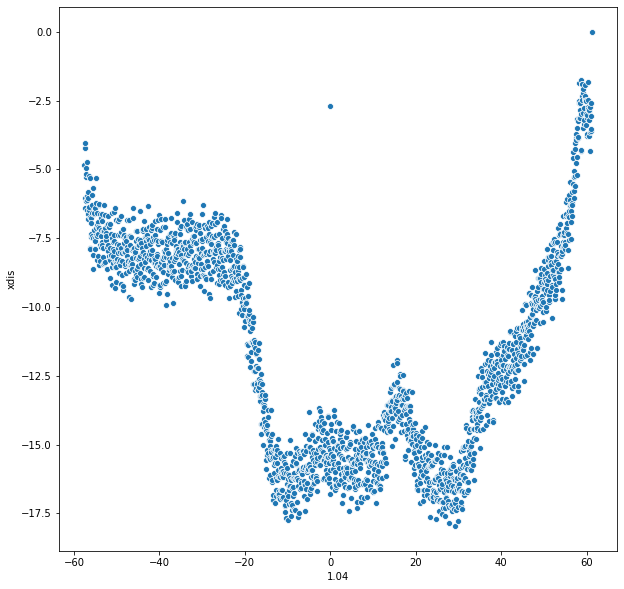

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(x,df2['xdis'])

In [10]:
# from mpl_toolkits import mplot3d
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# ax=plt.axes(projection='3d')
# #ax.plot_trisurf(x,y,z,cmap=plt.cm.viridis,linewidth=0.2)
# ax.plot_surface(x,y,z,cmap='viridis')
# plt.show()

In [11]:
df2.iloc[:,:] *= -1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-4509b2f5fbb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[:,:] *= -1


Text(0, 0.5, 'Current equivalent')

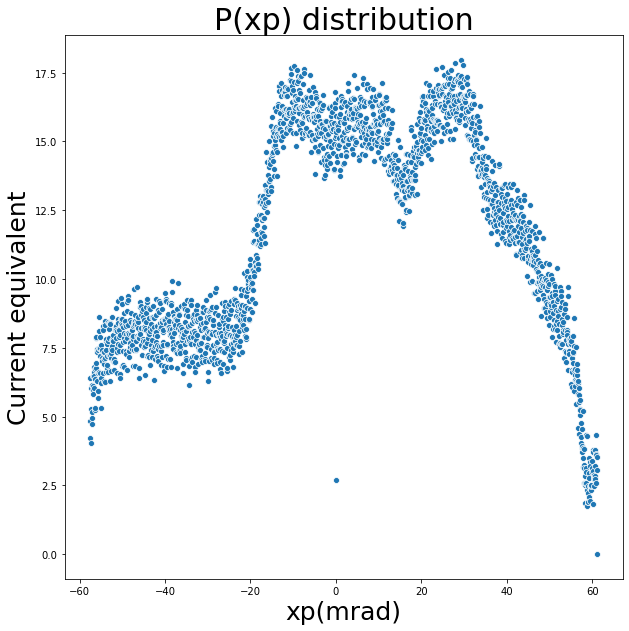

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x,df2['xdis'])
plt.title('P(xp) distribution',fontsize=30)
plt.xlabel('xp(mrad)',fontsize=25)
plt.ylabel('Current equivalent',fontsize=25)

In [14]:
px=df2.sum(axis=0)
px.drop(labels='xdis', axis=0,inplace=True)
len(y)
px.shape

(157,)

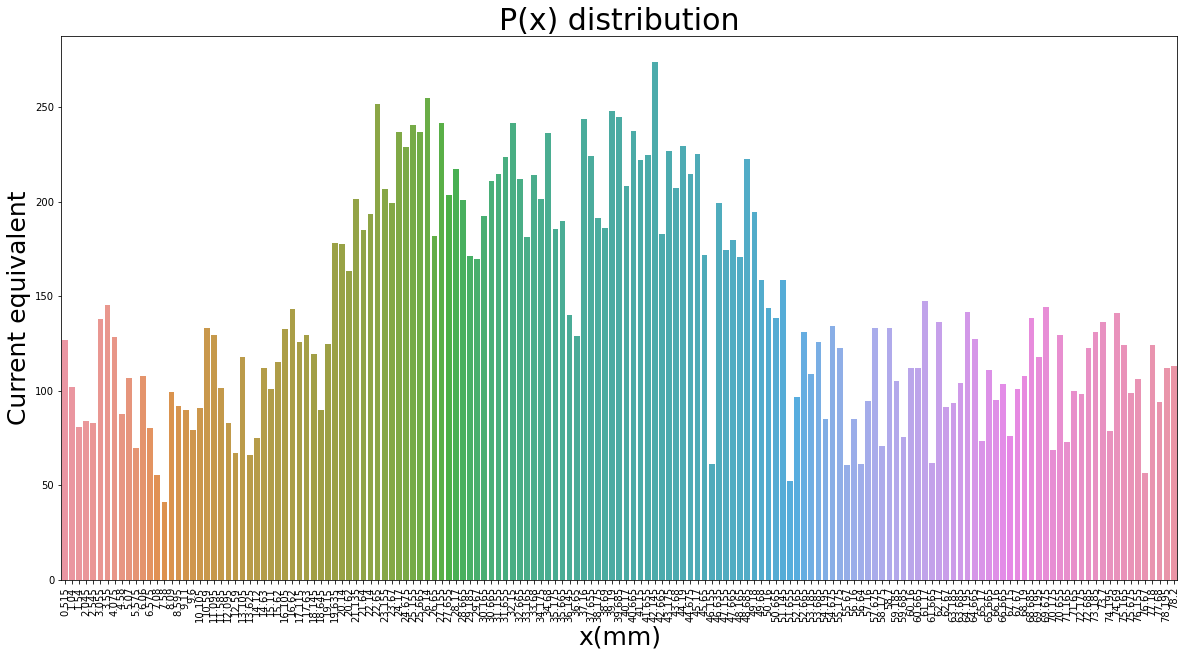

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(y,px)
#sns.scatterplot(y,px)
plt.title('P(x) distribution',fontsize=30)
plt.xlabel('x(mm)',fontsize=25)
plt.ylabel('Current equivalent',fontsize=25)
plt.xticks(rotation=90)
plt.show()